In [1]:
import onnxruntime as ort

ort.preload_dlls()
rt = ort.InferenceSession(
    "data/illustris/models/decoder.onnx", providers=["CPUExecutionProvider"]
)

In [2]:
import numpy as np

input = np.array([[1.0, 0.0, 0.0]], dtype=np.float32)
output = rt.run(None, {"x": input})[0]
print(output.shape, output.min(), output.max(), output.mean(), output.std())

(1, 3, 128, 128) -0.68844557 4.743105 0.035668556 0.8068457


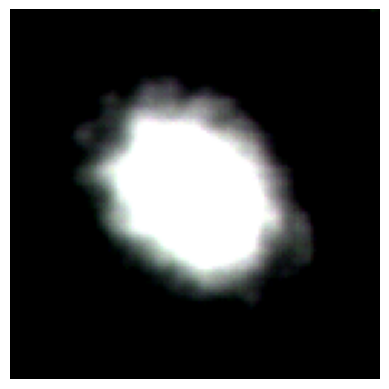

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

image = output[0]
image = np.clip(image.transpose(1, 2, 0), 0, 1)
image = (image * 255).astype(np.uint8)
image = Image.fromarray(image)

plt.imshow(image)
plt.axis("off")
plt.show()